Am rezolvat tema in acelasi document cu cerintele, sub cerinte sunt rezolvarile. Echipa este formata din Ghidarcea Tudor-Alexandru si Grigore Dragos-Gabriel.

# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [numpy](https://numpy.org/), [matplotlib](https://matplotlib.org/), și [sounddevice](https://python-sounddevice.readthedocs.io/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# Generarea unui semnal sinusoidal

Întâi trebuie să definim parametrii sinusoidei continuue:

* orizontul de timp ($t$)
* frecvența semnalului original ($f_0$)
* amplitudinea ($A$)
* faza ($\varphi$)

In [3]:
time_of_view = 1     # s
frequency = 2        # Hz
amplitude = 1
phase = 0

Iar apoi parametrii de măsurare, sinusoida discretizată:
* frecvența de eșantionare ($f_s$)
* perioada de eșantionare ($t_s$)
* numărul de eșantionare ($n$)

In [4]:
sampling_rate = 12    # Hz
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period

Cu datele de mai sus putem genera orizontul de timp cu momentele de interes pentru semnalul continuu și cel discretizat ($t$, respectiv $nt_s$):

In [5]:
atime = np.linspace (0, time_of_view, int(10e5 + 1)) # s.
time = np.linspace (0, time_of_view, int(n_samples + 1))

*Observație*: orizontul de timp continuu (analog) este de fapt un orizont de timp discret ($nt_s$) foarte dens ($n=10^5$ eșantione).

Cu aceste date putem crea o funcție sinus ce generează sinusoidele parametrizate conform variabilelor de mai sus:

In [6]:
def sine (amplitude, frequency, time, phase):
    return amplitude * np.sin (2 * np.pi * frequency * time + phase)

## Sinusoidă continuă
Pentru a obține o sinusoidă "continuă" putem apela funcția ```sine```:

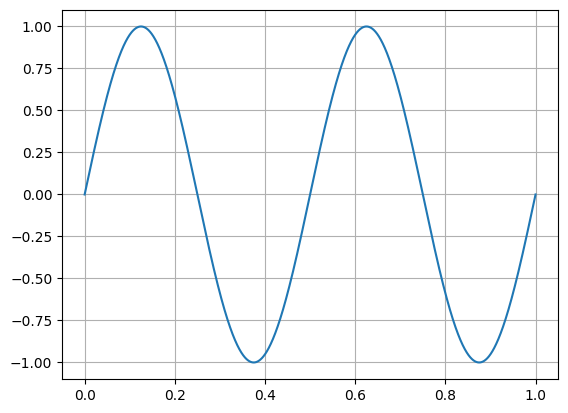

In [7]:
asignal = sine(amplitude, frequency, atime, phase)

plt.grid(True)
plt.plot (atime, asignal)

## Sinusoidă discretizată
Discretizarea se obține apelând aceiași funcție ```sine``` dar cu parametrii discreți și folosind ```stem``` pentru a obține cele $n$ eșantioane:

<StemContainer object of 3 artists>

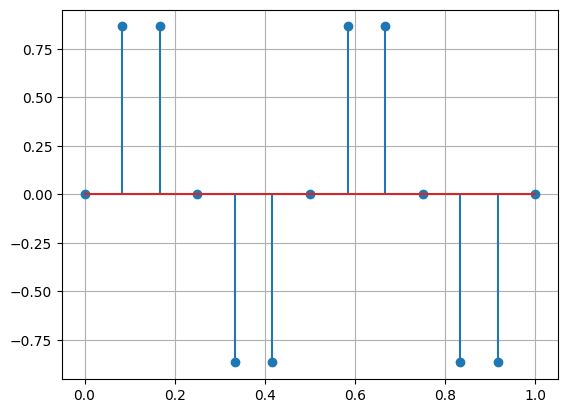

In [8]:
signal = sine(amplitude, frequency, time, phase)

plt.grid(True)
plt.stem (time, signal)

# Producerea și audiția unui ton

Pentru a produce o sinusoidă ce poate fi percepută de urechea umană trebuie să creștem frecvența și amplitudinea acesteia.

În exemplul de mai jos generăm o sinusoidă de frecvență $f_0=440\text{Hz}$ și amplitudine $10.000$ pe care o discretizăm cu frecvența de eșantionare $f_s=44.100\text{Hz}$ pe un orizont de timp de $2\text{s}$.

In [9]:
time_of_view = 2     # s
frequency = 440      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

tone = sine(amplitude, frequency, time, phase)

Aceast ton îl vom discretiza cu o frecvență de eșantionare $f_s$ conform ```sampling_rate``` și îl vom transforma în formatul WAV prin conversia eșantioanelor la întregi pe 16-biți:

In [10]:
sd.default.samplerate = sampling_rate
wav_wave = np.array(tone, dtype=np.int16)
sd.play(wav_wave, blocking=True)
sd.stop()

# Sarcini

1. [8p] Scrieți tonurile pentru notele muzicale Do, Re, Mi, Fa, Sol, La, Si, Do.

2. [8p] Compuneți un cântec simplu clasic (ex. Frère Jacques) într-un singur semnal.

3. [4p] Citiți o partitură la intrare (folosind [LilyPond](https://lilypond.org/) sau formatul propriu) și produceți semnalul ce conține melodia la ieșire prin compunerea tonurilor asociate notelor automat.

# Rezolvari

1. [8p] Scrieți tonurile pentru notele muzicale Do, Re, Mi, Fa, Sol, La, Si, Do.

    In prima casuta de cod, am creat semnalele pentru toate notele de la La pana la LaDiez, adica o octava.
    Unele note sunt din octava superioara, pentru a face melodia pe care am compus-o sa sune corect, dar reprezinta in continuare nota corespunzatoare. Am facut toate notele diatonice, cromatic (adica si alterarile), pentru a acoperi toate posibilitatile sonore. Am creat si un semnal pe nume Liniste, pentru a tine locul unei note lipsa, si doua semnale de Bass pentru a adauga niste dimensiune sunetului.

2. [8p] Compuneți un cântec simplu clasic (ex. Frère Jacques) într-un singur semnal.
 
    In a doua casuta de cod, am creat doua array-uri: unul se numeste solo, care contine secventa de note si liniste aferenta melodiei pe care am ales sa o reproduc, iar al doilea array contine notele de bass. Urmeaza sa suprapun aceste doua array-uri impreuna cand le transform intr-un semnal de tip Wav, pe 16 biti, ce va contine ambele secvente de note impreuna. Apelul functiei sd.play() ne va canta melodia.

3. [4p] Citiți o partitură la intrare (folosind [LilyPond](https://lilypond.org/) sau formatul propriu) și produceți semnalul ce conține melodia la ieșire prin compunerea tonurilor asociate notelor automat.

    In a treia casuta de cod, voi citi un fisier text ce contine o secventa de note, o voi stoca intr-un array similar cu cel de la punctul 2 si apoi voi apela functia sd.play pentru acel array.

In [11]:
time_of_view = 0.25     # s
frequency = 43.65      # Hz
amplitude = 20000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

BassFa1= sine(amplitude, frequency, time, phase)



time_of_view = 0.25     # s
frequency = 87.31      # Hz
amplitude = 20000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

BassFa2= sine(amplitude, frequency, time, phase)



time_of_view = 0.25     # s
frequency = 87.31      # Hz
amplitude = 10000
phase = 0


time_of_view = 0.25     # s
frequency = 0      # Hz
amplitude = 0
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

Liniste= sine(amplitude, frequency, time, phase)




time_of_view = 0.25     # s
frequency = 440      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

La= sine(amplitude, frequency, time, phase)



time_of_view = 0.25     # s
frequency = 466.16      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

LaDiez= sine(amplitude, frequency, time, phase)




time_of_view = 0.25     # s
frequency = 493.88     # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

Si= sine(amplitude, frequency, time, phase)




time_of_view = 0.25     # s
frequency = 261.63      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

Do= sine(amplitude, frequency, time, phase)




time_of_view = 0.25     # s
frequency = 554.37      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

DoDiez= sine(amplitude, frequency, time, phase)




time_of_view = 0.25     # s
frequency = 587.33      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

Re= sine(amplitude, frequency, time, phase)




time_of_view = 0.25     # s
frequency = 311.13      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

ReDiez= sine(amplitude, frequency, time, phase)




time_of_view = 0.25     # s
frequency = 659.25      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

Mi= sine(amplitude, frequency, time, phase)




time_of_view = 0.25     # s
frequency = 349.23      # Hz
amplitude = 10000
phase = 0
False
sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

Fa= sine(amplitude, frequency, time, phase)




time_of_view = 0.25     # s
frequency = 369.99      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

FaDiez= sine(amplitude, frequency, time, phase)




time_of_view = 0.25     # s
frequency = 392.00      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

Sol= sine(amplitude, frequency, time, phase)




time_of_view = 0.25     # s
frequency = 415.25      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

SolDiez= sine(amplitude, frequency, time, phase)




time_of_view = 0.25     # s
frequency = 523.26      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

DoSus= sine(amplitude, frequency, time, phase)

In [12]:




solo=np.concatenate([Do,Do,Do,SolDiez,SolDiez,
                          FaDiez,FaDiez,Fa,SolDiez, FaDiez, Fa, ReDiez, Fa, FaDiez,SolDiez,LaDiez,
                       Do,Do,Do,SolDiez,SolDiez,
                          FaDiez,FaDiez,Fa,SolDiez, FaDiez, Fa, DoSus, Fa, DoSus,Fa,Liniste,
                    Fa,Fa,Fa,Fa,DoDiez,DoDiez,DoDiez,DoDiez, LaDiez, LaDiez, LaDiez, LaDiez, FaDiez, FaDiez,
                     Fa, Liniste,
                    Fa,Do,Fa,Fa,DoDiez,DoDiez,DoDiez,DoDiez, LaDiez, LaDiez, LaDiez, LaDiez, FaDiez,FaDiez,Fa,Liniste
                    ])



bass=np.concatenate([BassFa1, Liniste,Liniste,BassFa1, Liniste, BassFa1, Liniste,Liniste,
                         BassFa1, Liniste, Liniste, Liniste, BassFa2, BassFa1, BassFa2, BassFa2,
                       BassFa1, Liniste,Liniste,BassFa1, Liniste, BassFa1, Liniste,Liniste,
                         BassFa1, Liniste, Liniste, Liniste, BassFa2, BassFa1, BassFa2, BassFa2,
                    BassFa1, Liniste,Liniste,BassFa1, Liniste, BassFa1, Liniste,Liniste,
                         BassFa1, Liniste, Liniste, Liniste, BassFa2, BassFa1, BassFa2, BassFa2,
                       BassFa1, Liniste,Liniste,BassFa1, Liniste, BassFa1, Liniste,Liniste,
                         BassFa1, Liniste, Liniste, Liniste, BassFa2, BassFa1, BassFa2, BassFa2])
sd.sample_rate=sampling_rate
wav_melodie=np.array(solo+bass, dtype=np.int16)

sd.play(wav_melodie, blocking = True)





In [13]:

file = open('partitura1.partitura', 'r')
words = []
lines = file.read().splitlines()
for line in lines:
    words.extend(line.split(','))
Dictionar = {
  "Fa": Fa,
  "FaDiez": FaDiez,
  "SolDiez": SolDiez,
  "ReDiez": ReDiez,
   "BassFa1" : BassFa1,
    "BassFa2":BassFa2,
    "Liniste":Liniste,
    "Do": Do,
    "Re":Re,
    "Sol":Sol,
    "La":La,
    "Si":Si,
    "DoDiez":Do,
    "DoSus":DoSus,
    "LaDiez":LaDiez,
    " FaDiez":FaDiez,
    "Mi":Mi,
    " Fa":Fa,
    " LaDiez":LaDiez
}

partitura = np.array([])
for word in words:
    partitura=np.concatenate((partitura, Dictionar[word]))

sd.sample_rate=sampling_rate
wav_melodie=np.array(partitura, dtype=np.int16)

sd.play(partitura, blocking = True)



Sursele folosite:

https://pages.mtu.edu/~suits/notefreqs.html  -  de aici am luat frecventele notelor muzicale (exercitiul 1);

https://www.youtube.com/watch?v=qB6BGsCqAgA  -  ( Ciguli - Binnaz) este piesa pe care am compus-o din note pentru

 a o canta programul (exercitiul 2). Nu am folosit o partitura, am scos notele dupa ureche;

Partitura pentru exercitiul 3 am alcatuit-o din notele pe care le am transcris eu, nu am folosit o sursa;